In [1]:
%matplotlib inline
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import numpy as np
tf.set_random_seed(777)

In [2]:
def MinMaxScaler(data):
    ''' Min Max Normalization
    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]
    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]
    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [3]:
timesteps = seq_length = 7
data_dim =5
output_dim=1
hidden_dim =10
learing_rate =0.01
iterations =500

xy = np.loadtxt('study/data-02-stock_daily.csv',delimiter=',')
xy = xy[::-1]
xy =MinMaxScaler(xy)

x = xy
y = xy[:,[-1]]

dataX = []
dataY = []
for i in range(0,len(y) -seq_length):
    _x = x[i:i+seq_length]
    _y = y[i+seq_length]
    print(_x,"->",_y)
    dataX.append(_x)
    dataY.append(_y)

[[2.13751054e-01 2.08179810e-01 1.91791832e-01 4.66075110e-04
  1.92092403e-01]
 [1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142110e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967473e-01]
 [2.33129931e-01 2.36419163e-01 1.62682724e-01 5.70171193e-01
  1.47442742e-01]] -> [0.13289962]
[[1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142110e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967473e-01]
 [2.33129931e-01 2.3641

[[0.66487717 0.66774743 0.6288306  0.46256162 0.62794121]
 [0.60968389 0.60123909 0.56512538 0.45691494 0.55671201]
 [0.50471753 0.54354664 0.51497679 0.37998566 0.55429296]
 [0.5177437  0.58941742 0.53173215 0.32275701 0.54079904]
 [0.56011482 0.59349282 0.57093539 0.23573541 0.55831492]
 [0.5255535  0.55892346 0.53201961 0.27033253 0.5553713 ]
 [0.57002287 0.57164133 0.56057695 0.19122524 0.55330215]] -> [0.57836636]
[[0.60968389 0.60123909 0.56512538 0.45691494 0.55671201]
 [0.50471753 0.54354664 0.51497679 0.37998566 0.55429296]
 [0.5177437  0.58941742 0.53173215 0.32275701 0.54079904]
 [0.56011482 0.59349282 0.57093539 0.23573541 0.55831492]
 [0.5255535  0.55892346 0.53201961 0.27033253 0.5553713 ]
 [0.57002287 0.57164133 0.56057695 0.19122524 0.55330215]
 [0.57794917 0.58392557 0.57950373 0.22515909 0.57836636]] -> [0.62907789]
[[0.50471753 0.54354664 0.51497679 0.37998566 0.55429296]
 [0.5177437  0.58941742 0.53173215 0.32275701 0.54079904]
 [0.56011482 0.59349282 0.57093539 0.2

In [4]:
train_size = int(len(dataY)*0.7)
test_size = len(dataY) - train_size

trainX , testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY , testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

In [5]:
X = tf.placeholder(tf.float32, [None, seq_length,data_dim])
Y = tf.placeholder(tf.float32, [None,1])

cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim , state_is_tuple=True ,activation=tf.tanh)
outputs, states = tf.nn.dynamic_rnn(cell , X, dtype =tf.float32)
Y_pred = tf.contrib.layers.fully_connected(outputs[:,-1],output_dim,activation_fn=None)

In [6]:
loss = tf.reduce_sum(tf.square(Y_pred -Y))
optimizer =tf.train.AdamOptimizer(learing_rate)
train = optimizer.minimize(loss)

targets =tf.placeholder(tf.float32, [None,1])
predictions = tf.placeholder(tf.float32 ,[None,1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets -predictions)))

[step: 0] loss: 138.57077026367188
[step: 1] loss: 87.60054016113281
[step: 2] loss: 49.78003692626953
[step: 3] loss: 24.82027244567871
[step: 4] loss: 12.329051971435547
[step: 5] loss: 11.164790153503418
[step: 6] loss: 17.21660804748535
[step: 7] loss: 22.804136276245117
[step: 8] loss: 23.583499908447266
[step: 9] loss: 20.283634185791016
[step: 10] loss: 15.2396821975708
[step: 11] loss: 10.427783012390137
[step: 12] loss: 6.942037105560303
[step: 13] loss: 5.072293758392334
[step: 14] loss: 4.580635070800781
[step: 15] loss: 4.985069274902344
[step: 16] loss: 5.770790100097656
[step: 17] loss: 6.516499042510986
[step: 18] loss: 6.947330474853516
[step: 19] loss: 6.936463356018066
[step: 20] loss: 6.479718208312988
[step: 21] loss: 5.6615705490112305
[step: 22] loss: 4.621974468231201
[step: 23] loss: 3.5263819694519043
[step: 24] loss: 2.5380752086639404
[step: 25] loss: 1.7916876077651978
[step: 26] loss: 1.3687282800674438
[step: 27] loss: 1.279186725616455
[step: 28] loss: 1.

[step: 234] loss: 0.7443877458572388
[step: 235] loss: 0.7435457706451416
[step: 236] loss: 0.7427046895027161
[step: 237] loss: 0.7418643236160278
[step: 238] loss: 0.7410249710083008
[step: 239] loss: 0.7401863932609558
[step: 240] loss: 0.7393490076065063
[step: 241] loss: 0.7385123372077942
[step: 242] loss: 0.7376765012741089
[step: 243] loss: 0.73684161901474
[step: 244] loss: 0.736007809638977
[step: 245] loss: 0.735174834728241
[step: 246] loss: 0.7343429327011108
[step: 247] loss: 0.7335118055343628
[step: 248] loss: 0.7326818108558655
[step: 249] loss: 0.7318525910377502
[step: 250] loss: 0.7310245037078857
[step: 251] loss: 0.7301973700523376
[step: 252] loss: 0.7293713092803955
[step: 253] loss: 0.7285460829734802
[step: 254] loss: 0.7277219891548157
[step: 255] loss: 0.7268988490104675
[step: 256] loss: 0.7260767817497253
[step: 257] loss: 0.7252559065818787
[step: 258] loss: 0.7244358658790588
[step: 259] loss: 0.7236169576644897
[step: 260] loss: 0.7227991223335266
[step

[step: 465] loss: 0.5895164012908936
[step: 466] loss: 0.5890609622001648
[step: 467] loss: 0.5886073708534241
[step: 468] loss: 0.5881554484367371
[step: 469] loss: 0.5877052545547485
[step: 470] loss: 0.5872567892074585
[step: 471] loss: 0.5868099927902222
[step: 472] loss: 0.5863648653030396
[step: 473] loss: 0.5859214067459106
[step: 474] loss: 0.5854797959327698
[step: 475] loss: 0.5850396156311035
[step: 476] loss: 0.5846012830734253
[step: 477] loss: 0.5841644406318665
[step: 478] loss: 0.5837293863296509
[step: 479] loss: 0.5832958817481995
[step: 480] loss: 0.582863986492157
[step: 481] loss: 0.5824336409568787
[step: 482] loss: 0.5820050835609436
[step: 483] loss: 0.5815779566764832
[step: 484] loss: 0.5811523199081421
[step: 485] loss: 0.5807285308837891
[step: 486] loss: 0.5803062319755554
[step: 487] loss: 0.5798853635787964
[step: 488] loss: 0.5794662237167358
[step: 489] loss: 0.5790483951568604
[step: 490] loss: 0.5786322355270386
[step: 491] loss: 0.578217625617981
[st

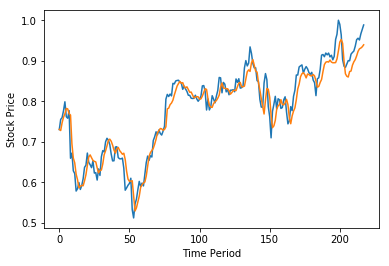

In [7]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()